<a href="https://colab.research.google.com/github/ahmedSadoun/colab-project/blob/main/flower_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 440M/450M [00:03<00:00, 159MB/s]
100% 450M/450M [00:03<00:00, 153MB/s]


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zf='/content/flowers-recognition.zip'
target_dir = "/content/dataset/"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)
#/content/dataset/flowers/daisy/100080576_f52e8ee070_n.jpg

In [ ]:
import keras
squeezenet="/content/drive/MyDrive/flowers/SqueezeNet_flowers.h5"
vgg16="/content/drive/MyDrive/Copy of vgg16_model flowers.h5"
densenetpath="/content/drive/MyDrive/Copy of Densenetflower.h5"
inceptionresnetv2="/content/drive/MyDrive/flowers/InceptionResNetV2_flowers.h5"
mobilenet='/content/drive/MyDrive/flowers/MobileNetV2_flowers.h5'
xception="/content/drive/MyDrive/flowers/Xception_flowers.h5"
resnet50="/content/drive/MyDrive/flowers/ResNet_flowers.h5"
inceptionv3="/content/drive/MyDrive/Copy of InceptionV3Flowers.h5"
alexnet="/content/drive/MyDrive/Copy of Copy of alexnet_flowers.h5"
paths=[densenetpath,inceptionresnetv2,inceptionv3,mobilenet,resnet50,squeezenet,vgg16,xception,alexnet]
model_name=['densenet','inceptionresnetv2','inceptionv3','mobilenet','resnet50','vgg16','squeezenet','xception',"alexnet"]
model_image_size=[100,180,150,224,224,192,224,224,227]      
def pick_model(model_name):
  model=keras.models.load_model(paths[model_name-1])
  return model



choose model numper: 

1 densenet
2 inceptionresnetv2
3 inceptionv3
4 mobilenet
5 resnet50
6 vgg16
7 squeezenet
8 xception
9 alexnet
 your selection : 9
predict time: 0.189 s
Predicted class: dandelion
Likelihood: 1.0


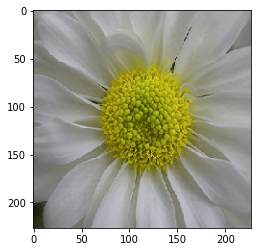

In [ ]:
display_model_name()

In [ ]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
import time


In [ ]:
def choose_image_and_predict(model_name,image_size):
   
    
   # pneumonia_images = glob('/content/dataset/data/HAM10000_images_part_1'+'/*')
   # img_choice = (random.choice(pneumonia_images))
    img_selection="/content/dataset/flowers/daisy/100080576_f52e8ee070_n.jpg"
    img = load_img(img_selection, target_size=(image_size, image_size))
    img = img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    model=pick_model(model_name)
    
    t0=time.time()
    pred = model.predict(x)
    t1=time.time()
    print ("predict time:", round(t1-t0, 3), "s")
    pred_class = np.argmax(pred,axis=1)
    
    if pred_class[0] == 0:
        print("Predicted class:daisy")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")
    elif  pred_class[0] == 1:
        print("Predicted class: dandelion")
        print('Likelihood:', pred[0][1].round(4))
        if pred[0][1].round(4) < 0.8:
            print("WARNING, low confidence") 
    elif pred_class[0] == 2:
        print("Predicted class: rose")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")
    elif  pred_class[0] == 3:
        print("Predicted class: sun flower")
        print('Likelihood:', pred[0][1].round(4))
        if pred[0][1].round(4) < 0.8:
            print("WARNING, low confidence")  
    
    elif pred_class[0] == 4:
        print("Predicted class:tulip")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")



   


In [ ]:

def display_model_name():
    print('choose model numper: \n')
    for i in range(len(model_name)):
      print(i+1,model_name[i])
    x=int(input(" your selection : "))      
    choose_image_and_predict(x,model_image_size[x-1])